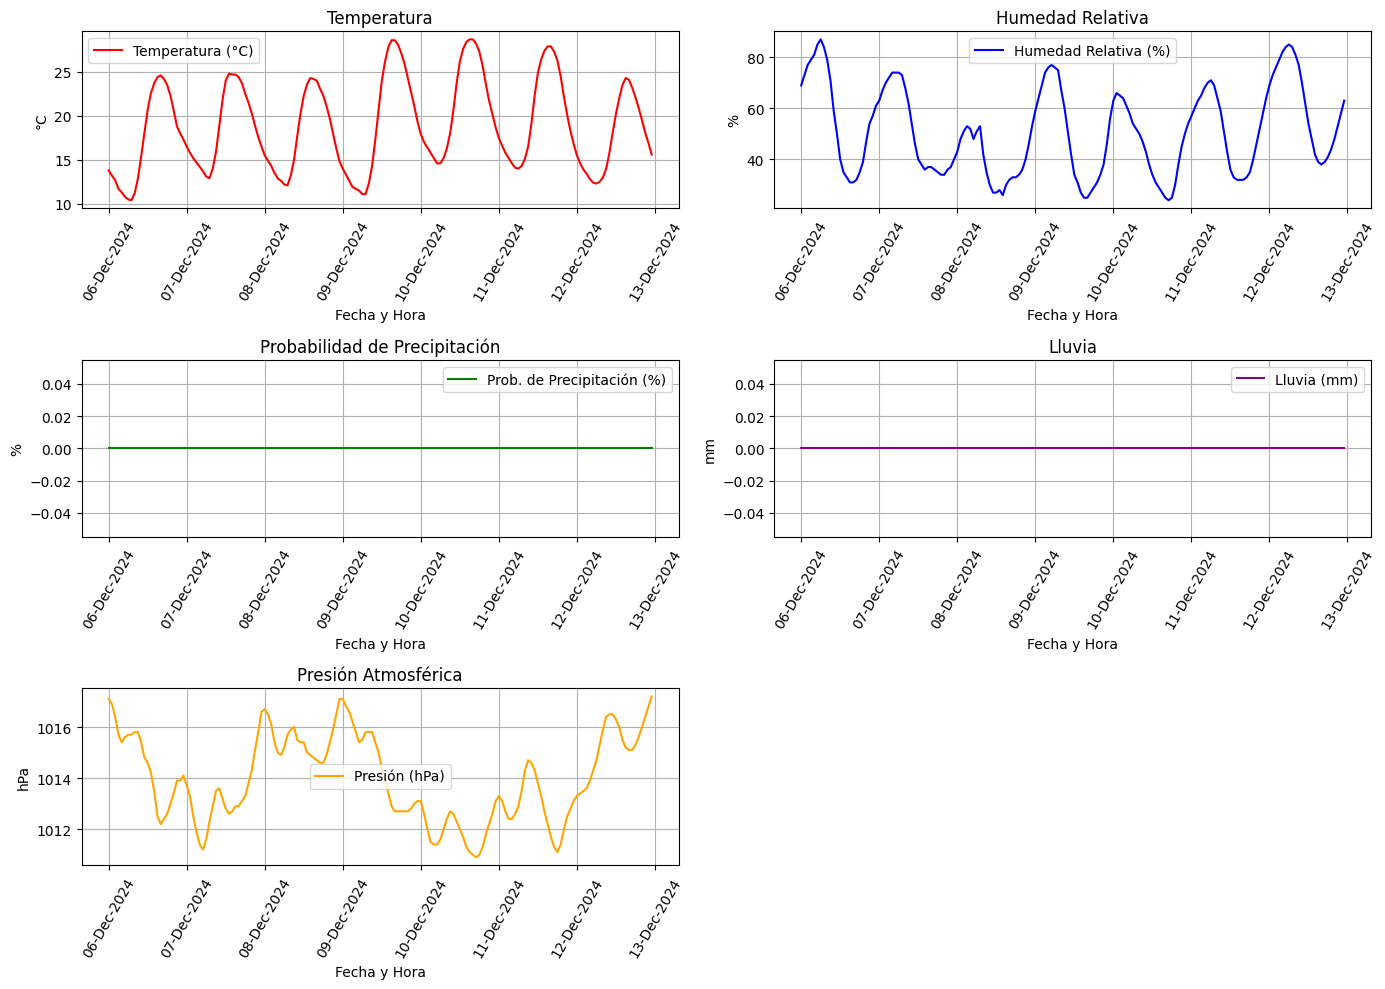

In [1]:
import requests
import matplotlib.pyplot as plt
import numpy as np
from datetime import datetime
import matplotlib.dates as mdates

def obtener_datos_clima():
    # URL de la API de Open-Meteo
    url = "https://api.open-meteo.com/v1/forecast?latitude=-33.4569&longitude=-70.6483&hourly=temperature_2m,relative_humidity_2m,precipitation_probability,rain,snowfall,pressure_msl,surface_pressure,wind_speed_10m,wind_direction_10m&timezone=America%2FSao_Paulo"
    
    # Realizar la solicitud GET
    response = requests.get(url)
    
    if response.status_code == 200:
        datos = response.json()
        return datos['hourly']
    else:
        print(f"Error en la solicitud: {response.status_code}")
        return None

def graficar_datos_clima(datos):
    # Extraer datos
    horas = datos['time']  # Tiempos en formato ISO 8601
    fechas = [datetime.fromisoformat(h) for h in horas]  # Convertir a objetos datetime
    temperatura = datos['temperature_2m']
    humedad = datos['relative_humidity_2m']
    prob_precipitacion = datos['precipitation_probability']
    lluvia = datos['rain']
    presion = datos['pressure_msl']
    
    # Crear la figura y los subgráficos
    fig, axs = plt.subplots(3, 2, figsize=(14, 10))
    axs = axs.ravel()  # Aplanar el arreglo de subgráficos para facilitar el acceso
    
    # Formato de fechas
    date_format = mdates.DateFormatter("%d-%b-%Y")  # Día y mes (ejemplo: 04-Dec )
    
    # Temperatura
    axs[0].plot(fechas, temperatura, label="Temperatura (°C)", color="red")
    axs[0].set_title("Temperatura")
    axs[0].set_ylabel("°C")
    axs[0].grid()
    axs[0].legend()
    axs[0].xaxis.set_major_formatter(date_format)

    # Humedad
    axs[1].plot(fechas, humedad, label="Humedad Relativa (%)", color="blue")
    axs[1].set_title("Humedad Relativa")
    axs[1].set_ylabel("%")
    axs[1].grid()
    axs[1].legend()
    axs[1].xaxis.set_major_formatter(date_format)

    # Probabilidad de precipitación
    axs[2].plot(fechas, prob_precipitacion, label="Prob. de Precipitación (%)", color="green")
    axs[2].set_title("Probabilidad de Precipitación")
    axs[2].set_ylabel("%")
    axs[2].grid()
    axs[2].legend()
    axs[2].xaxis.set_major_formatter(date_format)

    # Lluvia
    axs[3].plot(fechas, lluvia, label="Lluvia (mm)", color="purple")
    axs[3].set_title("Lluvia")
    axs[3].set_ylabel("mm")
    axs[3].grid()
    axs[3].legend()
    axs[3].xaxis.set_major_formatter(date_format)

    # Presión
    axs[4].plot(fechas, presion, label="Presión (hPa)", color="orange")
    axs[4].set_title("Presión Atmosférica")
    axs[4].set_ylabel("hPa")
    axs[4].grid()
    axs[4].legend()
    axs[4].xaxis.set_major_formatter(date_format)

    # Ajustar fechas en todos los subgráficos
    for ax in axs:
        ax.tick_params(axis="x", rotation=60)  # Rotar etiquetas de fechas
        ax.set_xlabel("Fecha y Hora")

    # Ocultar el último subgráfico vacío si hay menos de 6 gráficos
    if len(axs) > 5:
        axs[5].axis("off")

    plt.tight_layout()
    plt.show()



# Obtener los datos de la API
datos_clima = obtener_datos_clima()

if datos_clima:
    # Graficar los datos
    graficar_datos_clima(datos_clima)



In [2]:
def buscar_hora_mas_cercana(lista_fechas, fecha_objetivo):
    """
    Encuentra el índice de la fecha más cercana en la lista a una fecha objetivo.

    Args:
        lista_fechas (list): Lista de objetos datetime.
        fecha_objetivo (datetime): Fecha a la que se quiere encontrar la más cercana.

    Returns:
        int: Índice de la fecha más cercana.
    """
    diferencias = [abs((fecha - fecha_objetivo).total_seconds()) for fecha in lista_fechas]
    indice_mas_cercano = diferencias.index(min(diferencias))
    return indice_mas_cercano


In [ ]:
def consultar_clima(datos):
    # Extraer datos
    horas = datos['time']  # Tiempos en formato ISO 8601
    temperaturas = datos['temperature_2m']
    humedades = datos['relative_humidity_2m']
    precipitaciones_probabilidad = datos['precipitation_probability']
    lluvias = datos['rain']
    nieves = datos.get('snowfall', [0] * len(horas))  # Manejar la ausencia de nieve
    presion_msl = datos['pressure_msl']
    presion_superficie = datos.get('surface_pressure', [0] * len(horas))  # Manejar la ausencia de presión superficial
    direccion_viento = datos.get('wind_direction_10m', [0] * len(horas))  # Manejar la ausencia de dirección del viento
    velocidad_viento = datos.get('windspeed_10m', [0] * len(horas))  # Manejar la ausencia de velocidad del viento
    
    
    # Convertir las horas a objetos datetime
    fechas = [datetime.fromisoformat(h) for h in horas]
    
    # Pedir al usuario una fecha y hora
    print("Por favor, ingresa la fecha y hora que deseas consultar (formato: AAAA-MM-DD HH:MM):")
    consulta = input("Fecha y hora: ")
    
    try:
        # Convertir la entrada del usuario en datetime
        consulta_datetime = datetime.strptime(consulta, "%Y-%m-%d %H:%M")
        
        # Buscar la hora más cercana disponible
        indice_mas_cercano = buscar_hora_mas_cercana(fechas, consulta_datetime)
        hora_mas_cercana = fechas[indice_mas_cercano]
        
        # Obtener los valores correspondientes a esa hora
        temperatura = temperaturas[indice_mas_cercano]
        humedad = humedades[indice_mas_cercano]
        probabilidad_precipitacion = precipitaciones_probabilidad[indice_mas_cercano]
        lluvia = lluvias[indice_mas_cercano]
        nieve = nieves[indice_mas_cercano]
        presion_nivel_mar = presion_msl[indice_mas_cercano]
        presion_superficie_valor = presion_superficie[indice_mas_cercano]
        direccion_viento_valor = direccion_viento[indice_mas_cercano]
        velocidad_viento_valor = velocidad_viento[indice_mas_cercano]  # Velocidad del viento
        
        # Mostrar la información solicitada
        print(f"\nDatos para la hora más cercana a {consulta}: {hora_mas_cercana}")
        print(f"Temperatura: {temperatura}°C")
        print(f"Humedad relativa: {humedad}%")
        print(f"Probabilidad de precipitación: {probabilidad_precipitacion}%")
        print(f"Lluvias: {lluvia} mm")
        print(f"Nieve: {nieve} mm")
        print(f"Presión a nivel del mar: {presion_nivel_mar} hPa")
        print(f"Presión en superficie: {presion_superficie_valor} hPa")
        print(f"Dirección del viento: {direccion_viento_valor}°")
        #print(f"Velocidad del viento: {velocidad_viento_valor} km/h")  # Mostrar la velocidad del viento
    except ValueError:
        print("El formato de fecha y hora es inválido. Por favor, intenta nuevamente.")

# Obtener los datos de la API
datos_clima = obtener_datos_clima()

if datos_clima:
    # Consultar clima interactivamente
    consultar_clima(datos_clima)


Por favor, ingresa la fecha y hora que deseas consultar (formato: AAAA-MM-DD HH:MM):

Datos para la hora más cercana a 2024-12-06 15:00: 2024-12-06 15:00:00
Temperatura: 24.4°C
Humedad relativa: 31%
Probabilidad de precipitación: 0%
Lluvias: 0.0 mm
Nieve: 0.0 mm
Presión a nivel del mar: 1012.5 hPa
Presión en superficie: 951.0 hPa
Dirección del viento: 234°
